In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### MSCI ESG data

In [2]:
msci_joint_spec = pd.read_csv(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\msci_results\up_down_hdfe_joint_spec_msci.csv")

In [3]:
msci_joint_spec['ci_L'] = [x[0] for x in msci_joint_spec.ci95.str.split(',')]
msci_joint_spec['ci_U'] = [x[1] for x in msci_joint_spec.ci95.str.split(',')]
msci_joint_spec = msci_joint_spec.drop('ci95', axis=1)

In [4]:
msci_joint_spec = msci_joint_spec.apply(pd.to_numeric, errors='ignore')

In [5]:
msci_joint_spec_up = msci_joint_spec.iloc[:39, :]
msci_joint_spec_down = msci_joint_spec.iloc[39:, :].rename(columns={'rel_period':'rel_period_down', 'b':'b_down', 'ci_L':'ci_L_down', 'ci_U':'ci_U_down'}).reset_index(drop=True)

In [6]:
msci_joint_spec = pd.concat([msci_joint_spec_up, msci_joint_spec_down], axis=1)

In [7]:
msci_joint_spec['leads_lags_num'] = [x for x in range(-13, 26)]

In [8]:
msci_joint_spec

,rel_period,b,ci_L,ci_U,rel_period_down,b_down,ci_L_down,ci_U_down,leads_lags_num
0,bin_before_up,0.017413,0.003868,0.030957,bin_before_down,0.005821,-0.014937,0.026579,-13
1,time_to_treatment_up_73,0.008020,-0.005527,0.021567,time_to_treatment_down_73,0.016729,-0.002690,0.036147,-12
2,time_to_treatment_up_74,0.013682,-0.001081,0.028445,time_to_treatment_down_74,0.003966,-0.014675,0.022607,-11
3,time_to_treatment_up_75,0.011131,0.000383,0.021880,time_to_treatment_down_75,0.006961,-0.010548,0.024470,-10
4,time_to_treatment_up_76,0.007953,-0.005495,0.021400,time_to_treatment_down_76,0.006946,-0.010413,0.024305,-9
5,time_to_treatment_up_77,0.014327,0.000849,0.027806,time_to_treatment_down_77,0.008147,-0.005253,0.021547,-8
6,time_to_treatment_up_78,0.009987,-0.001312,0.021285,time_to_treatment_down_78,0.002253,-0.011942,0.016448,-7
7,time_to_treatment_up_79,0.004915,-0.004798,0.014628,time_to_treatment_down_79,0.008512,-0.004006,0.021031,-6
8,time_to_treatment_up_80,0.008413,-0.002182,0.019009,time_to_treatment_down_80,-0.009045,-0.025310,0.007221,-5
9,time_to_treatment_up_81,0.005017,-0.002827,0.012860,time_to_treatment_down_81,0.001107,-0.011824,0.014038,-4


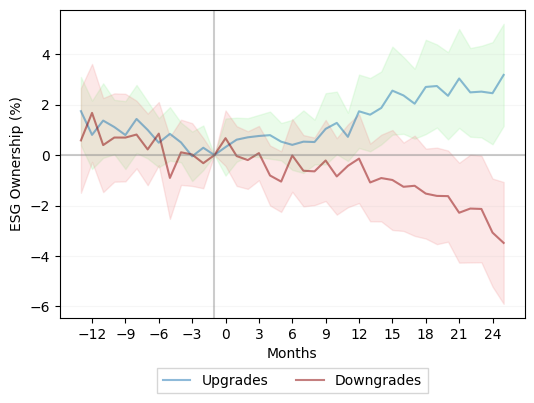

In [9]:
plt.figure(figsize=(6,4))

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b']*100, alpha=0.5, label='Upgrades')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L']*100), (msci_joint_spec['ci_U']*100), color='lightgreen', alpha=0.18)

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b_down']*100, c='darkred', alpha=0.5, label='Downgrades')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L_down']*100), (msci_joint_spec['ci_U_down']*100), color='lightcoral', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
# plt.title('TWFE estimates of reaction of ESG ownership to MSCI ESG ratings changes')
plt.savefig('msci_results/twfe_msci_joint_spec.png', bbox_inches="tight");

## FE vs IW estimates

In [10]:
iw_upgrades_msci = pd.read_excel(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\msci_results\upgrades_iw_msci.xlsx")

In [11]:
iw_upgrades_msci = iw_upgrades_msci.apply(pd.to_numeric, errors='ignore')

In [12]:
iw_upgrades_msci['leads_lags_num'] = [x for x in range(-13, 26)]

In [13]:
iw_upgrades_msci

,rel_period,b,Robust Std. Err.,t,P>|t|,ci_L,ci_U,leads_lags_num
0,bin_before_up,0.027498,0.007113,3.87,0.000,0.013350,0.041647,-13
1,time_to_treatment_up_73,0.009773,0.005964,1.64,0.105,-0.002089,0.021635,-12
2,time_to_treatment_up_74,0.014540,0.006977,2.08,0.040,0.000663,0.028416,-11
3,time_to_treatment_up_75,0.010981,0.005509,1.99,0.049,0.000025,0.021937,-10
4,time_to_treatment_up_76,0.009005,0.006187,1.46,0.149,-0.003300,0.021311,-9
5,time_to_treatment_up_77,0.014581,0.005746,2.54,0.013,0.003153,0.026009,-8
6,time_to_treatment_up_78,0.010164,0.004403,2.31,0.023,0.001407,0.018921,-7
7,time_to_treatment_up_79,0.006441,0.006163,1.05,0.299,-0.005816,0.018698,-6
8,time_to_treatment_up_80,0.009324,0.005457,1.71,0.091,-0.001531,0.020178,-5
9,time_to_treatment_up_81,0.005239,0.004116,1.27,0.207,-0.002948,0.013426,-4


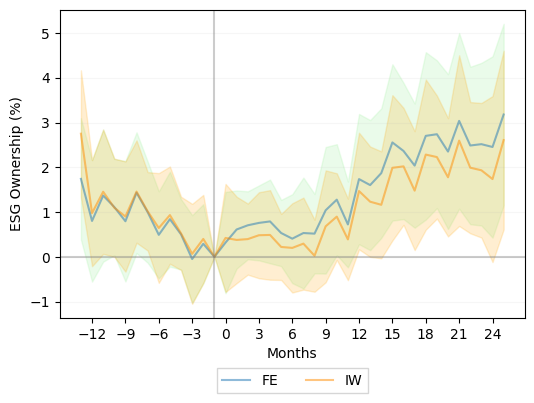

In [14]:
plt.figure(figsize=(6,4))

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b']*100, alpha=0.5, label='FE')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L']*100), (msci_joint_spec['ci_U']*100), color='lightgreen', alpha=0.18)

plt.plot(iw_upgrades_msci['leads_lags_num'], iw_upgrades_msci['b']*100, c='darkorange', alpha=0.5, label='IW')
plt.fill_between(iw_upgrades_msci['leads_lags_num'], (iw_upgrades_msci['ci_L']*100), (iw_upgrades_msci['ci_U']*100), color='orange', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
#plt.title('FE vs IW estimates of reaction of ESG ownership to MSCI ESG rating upgrades')
plt.savefig('msci_results/fe_iw_estimates_upgrades_msci.png', bbox_inches="tight");

In [15]:
iw_downgrades_msci = pd.read_excel(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\msci_results\downgrades_iw_msci.xlsx")

In [16]:
iw_downgrades_msci = iw_downgrades_msci.apply(pd.to_numeric, errors='ignore')

In [17]:
iw_downgrades_msci['leads_lags_num'] = [x for x in range(-13, 26)]

In [18]:
iw_downgrades_msci

,rel_period,b_down,Robust std.err,t,P>|t|,ci_L_down,ci_U_down,leads_lags_num
0,bin_before_down,0.013560,0.012528,1.08,0.282,-0.011357,0.038477,-13
1,time_to_treatment_down_73,0.017318,0.009634,1.80,0.076,-0.001844,0.036479,-12
2,time_to_treatment_down_74,0.004894,0.008463,0.58,0.565,-0.011939,0.021726,-11
3,time_to_treatment_down_75,0.008357,0.008493,0.98,0.328,-0.008535,0.025249,-10
4,time_to_treatment_down_76,0.004367,0.008197,0.53,0.596,-0.011937,0.020671,-9
5,time_to_treatment_down_77,0.007154,0.007896,0.91,0.368,-0.008550,0.022859,-8
6,time_to_treatment_down_78,0.001308,0.007017,0.19,0.853,-0.012648,0.015263,-7
7,time_to_treatment_down_79,0.009454,0.007697,1.23,0.223,-0.005855,0.024763,-6
8,time_to_treatment_down_80,-0.008582,0.006803,-1.26,0.211,-0.022112,0.004948,-5
9,time_to_treatment_down_81,0.001628,0.006654,0.24,0.807,-0.011606,0.014862,-4


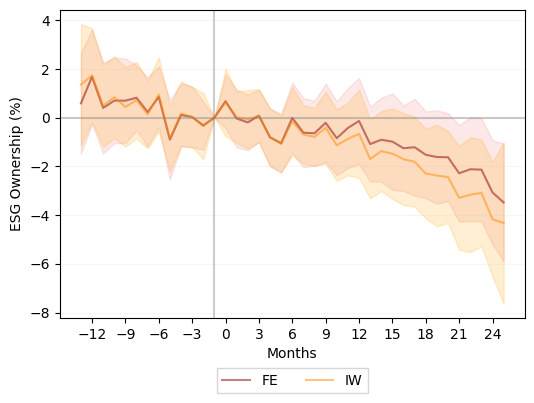

In [19]:
plt.figure(figsize=(6,4))

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b_down']*100, c='darkred', alpha=0.5, label='FE')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L_down']*100), (msci_joint_spec['ci_U_down']*100), color='lightcoral', alpha=0.18)

plt.plot(iw_downgrades_msci['leads_lags_num'], iw_downgrades_msci['b_down']*100, c='darkorange', alpha=0.5, label='IW')
plt.fill_between(iw_downgrades_msci['leads_lags_num'], (iw_downgrades_msci['ci_L_down']*100), (iw_downgrades_msci['ci_U_down']*100), color='orange', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
#plt.title('FE vs IW estimates of reaction of ESG ownership to MSCI ESG rating upgrades')
plt.savefig('msci_results/fe_iw_estimates_downgrades_msci.png', bbox_inches="tight");

## Estimating weights

In [20]:
# visualize weights on cohorts and relative time periods

In [21]:
estimated_weights_up = pd.read_csv('msci_results/weights_wide_format_msci.csv')

In [22]:
estimated_weights_up

,time_to_treatment_up,time_to_treatment_up_83648,time_to_treatment_up_83650,time_to_treatment_up_83651,time_to_treatment_up_83652,time_to_treatment_up_83653,time_to_treatment_up_83655,time_to_treatment_up_83656,time_to_treatment_up_83658,time_to_treatment_up_83660,...,time_to_treatment_up_83718,time_to_treatment_up_83719,time_to_treatment_up_83722,time_to_treatment_up_83723,time_to_treatment_up_83724,time_to_treatment_up_83725,time_to_treatment_up_83726,time_to_treatment_up_83730,time_to_treatment_up_83731,w_sum
0,-84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000964,0.000964
1,-83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000643,-0.000249,0.000393
2,-82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000166,-0.000068,-0.000234
3,-81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000045,-0.000241,-0.000286
4,-80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000160,-0.002196,-0.002356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,79,0.000608,-0.000056,0.000175,0.000012,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000740
164,80,-0.000098,0.000176,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000085
165,81,0.000227,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000234
166,82,0.001616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001616


In [23]:
estimated_weights_up = estimated_weights_up.set_index('time_to_treatment_up')

In [24]:
estimated_weights_up_for_table = estimated_weights_up.loc[-3:1]

In [25]:
for x,y in zip(estimated_weights_up_for_table.columns[:-1], range(1, len(estimated_weights_up_for_table.columns))):
    estimated_weights_up_for_table = estimated_weights_up_for_table.copy()
    estimated_weights_up_for_table.rename(columns={x:f'Cohort {y}'}, inplace=True)

In [26]:
estimated_weights_up_for_table = estimated_weights_up_for_table.reset_index()
estimated_weights_up_for_table = estimated_weights_up_for_table.rename(columns={'time_to_treatment_up':'Relative Period',
                                                                                   'w_sum':'Sum'})

In [27]:
# print(estimated_weights_up_for_table.set_index('Relative Period').T.to_latex(float_format="{:.4f}".format,
#                                                                           longtable=True))

In [28]:
print(estimated_weights_up_for_table.set_index('Relative Period').T.to_latex(float_format="{:.4f}".format))

\begin{tabular}{lrrrrr}
\toprule
Relative Period &      -3 &     -2 &      -1 &       0 &       1 \\
\midrule
Cohort 1  &     NaN &    NaN & -0.0427 &  0.0002 &  0.0006 \\
Cohort 2  &  0.0004 & 0.0078 & -0.0076 & -0.0001 & -0.0007 \\
Cohort 3  & -0.0001 & 0.0079 & -0.0076 & -0.0007 &  0.0008 \\
Cohort 4  &  0.0000 & 0.0157 & -0.0165 &  0.0016 & -0.0001 \\
Cohort 5  & -0.0007 & 0.1006 & -0.0947 & -0.0009 & -0.0007 \\
Cohort 6  &  0.0008 & 0.0078 & -0.0076 &  0.0001 & -0.0002 \\
Cohort 7  & -0.0001 & 0.0157 & -0.0149 & -0.0004 &  0.0004 \\
Cohort 8  &  0.0004 & 0.0231 & -0.0221 & -0.0002 &  0.0000 \\
Cohort 9  &  0.0002 & 0.0078 & -0.0076 &  0.0001 & -0.0003 \\
Cohort 10 & -0.0001 & 0.0079 & -0.0075 & -0.0003 &  0.0001 \\
Cohort 11 &  0.0003 & 0.0380 & -0.0372 &  0.0005 &  0.0003 \\
Cohort 12 & -0.0009 & 0.0240 & -0.0223 &  0.0002 & -0.0001 \\
Cohort 13 &  0.0001 & 0.0080 & -0.0075 & -0.0001 & -0.0001 \\
Cohort 14 &  0.0001 & 0.0078 & -0.0077 &  0.0000 &  0.0001 \\
Cohort 15 & -0.0001 & 

C:\Users\johnd\AppData\Local\Temp\ipykernel_16552\575136188.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(estimated_weights_up_for_table.set_index('Relative Period').T.to_latex(float_format="{:.4f}".format))


In [29]:
estimated_weights_up_only = estimated_weights_up.iloc[:,:-1].copy()

In [30]:
bin_before_up = estimated_weights_up_only.iloc[:72].sum().to_frame(name=-13).T
bin_after_up = estimated_weights_up_only.iloc[109:].sum().to_frame(name=25).T 
effect_window = estimated_weights_up_only.iloc[72:109]

In [31]:
weights_for_effect_window = pd.concat([bin_before_up, effect_window, bin_after_up])

### First 6 cohorts

In [32]:
weights_for_effect_window.iloc[:,0:6]

,time_to_treatment_up_83648,time_to_treatment_up_83650,time_to_treatment_up_83651,time_to_treatment_up_83652,time_to_treatment_up_83653,time_to_treatment_up_83655
-13,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
-12,NaN,NaN,NaN,NaN,NaN,NaN
-11,NaN,NaN,NaN,NaN,NaN,NaN
-10,NaN,NaN,NaN,NaN,NaN,NaN
-9,NaN,NaN,NaN,NaN,NaN,NaN
-8,NaN,NaN,NaN,NaN,NaN,0.000343
-7,NaN,NaN,NaN,NaN,NaN,-0.000032
-6,NaN,NaN,NaN,NaN,0.003924,-0.000065
-5,NaN,NaN,NaN,0.000752,-0.000395,-0.000027
-4,NaN,NaN,3.317910e-04,-0.000147,-0.000177,-0.000723


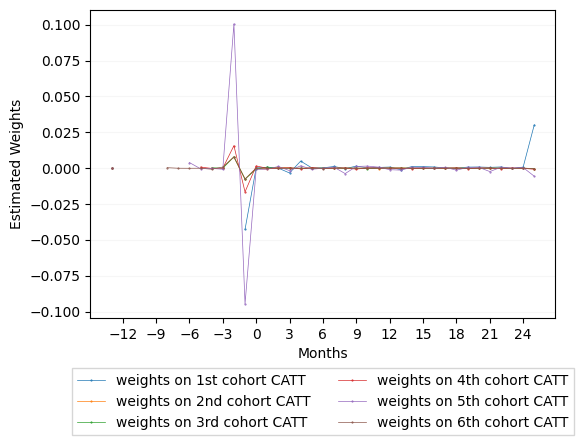

In [33]:
plt.figure(figsize=(6,4))

for x,y in zip(range(7), 
               ['weights on 1st cohort CATT', 'weights on 2nd cohort CATT', 'weights on 3rd cohort CATT', 
                'weights on 4th cohort CATT', 'weights on 5th cohort CATT', 'weights on 6th cohort CATT']):
    plt.plot(weights_for_effect_window.index,
               weights_for_effect_window.iloc[:,x],
           marker='.', label=y, linewidth=0.5, markersize=1)

    
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('Estimated Weights')
plt.grid(axis='y', alpha=0.1)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.savefig('msci_results/weights_msci_up_2.png', bbox_inches="tight");

## Downgrades

In [34]:
estimated_weights_down = pd.read_csv('msci_results/weights_downgrade_wide_format_msci.csv')

In [35]:
estimated_weights_down = estimated_weights_down.set_index('time_to_treatment_down')

In [36]:
estimated_weights_down_for_table = estimated_weights_down.loc[-3:1]

In [37]:
for x,y in zip(estimated_weights_down_for_table.columns[:-1], range(1, len(estimated_weights_down_for_table.columns))):
    estimated_weights_down_for_table = estimated_weights_down_for_table.copy()
    estimated_weights_down_for_table.rename(columns={x:f'Cohort {y}'}, inplace=True)

In [38]:
estimated_weights_down_for_table = estimated_weights_down_for_table.reset_index()
estimated_weights_down_for_table = estimated_weights_down_for_table.rename(columns={'time_to_treatment_down':'Relative Period',
                                                                                   'w_sum':'Sum'})

In [39]:
# print(estimated_weights_down_for_table.set_index('Relative Period').T.to_latex(float_format="{:.4f}".format, longtable=True))

In [40]:
estimated_weights_down = estimated_weights_down.iloc[:,:-1].copy()

In [41]:
bin_before_up = estimated_weights_down.iloc[:72].sum().to_frame(name=-13).T
bin_after_up = estimated_weights_down.iloc[109:].sum().to_frame(name=25).T 
effect_window = estimated_weights_down.iloc[72:109]

In [42]:
weights_for_effect_window = pd.concat([bin_before_up, effect_window, bin_after_up])

In [43]:
weights_for_effect_window

,time_to_treatment_down_83648,time_to_treatment_down_83649,time_to_treatment_down_83650,time_to_treatment_down_83651,time_to_treatment_down_83652,time_to_treatment_down_83653,time_to_treatment_down_83655,time_to_treatment_down_83656,time_to_treatment_down_83657,time_to_treatment_down_83658,...,time_to_treatment_down_83717,time_to_treatment_down_83718,time_to_treatment_down_83719,time_to_treatment_down_83721,time_to_treatment_down_83722,time_to_treatment_down_83723,time_to_treatment_down_83725,time_to_treatment_down_83729,time_to_treatment_down_83730,time_to_treatment_down_83731
-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000169,-1.453509e-04,-7.654091e-05,-1.821434e-04,-0.000127,-0.000160,-0.000105,-0.000210,-2.088307e-04,-0.000451
-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000207,9.872950e-06,-4.706578e-05,7.986919e-06,-0.000105,0.000010,-0.000161,-0.000048,1.076703e-05,-0.000311
-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000067,...,0.000116,8.120332e-07,-5.652133e-05,-5.661176e-05,0.000057,0.000002,0.000112,0.000059,-5.564369e-05,-0.000001
-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000248,0.000090,...,-0.000030,-7.245052e-05,4.109310e-05,4.161952e-05,-0.000014,-0.000129,-0.000128,-0.000071,-1.627583e-05,-0.000045
-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000107,0.000357,0.000122,...,-0.000087,6.987784e-05,-4.259865e-05,1.464513e-05,-0.000100,0.000126,0.000069,0.000013,1.376314e-05,0.000210
-8,NaN,NaN,NaN,NaN,NaN,NaN,-0.000164,0.000235,0.000362,-0.000224,...,0.000137,-4.411266e-05,7.004780e-05,-1.013721e-04,0.000124,-0.000100,0.000012,0.000012,6.879233e-05,-0.000131
-7,NaN,NaN,NaN,NaN,NaN,NaN,0.000243,0.000167,-0.000782,-0.000552,...,-0.000162,3.286614e-05,-2.289299e-05,8.692976e-05,-0.000137,0.000031,0.000034,0.000032,-8.070782e-05,0.000096
-6,NaN,NaN,NaN,NaN,NaN,-0.000821,0.000350,-0.000456,-0.001558,0.000793,...,0.000131,9.632727e-06,-1.048705e-04,-1.046757e-04,0.000063,0.000008,-0.000048,-0.000048,6.459495e-05,0.000027
-5,NaN,NaN,NaN,NaN,-0.000357,0.001411,-0.000722,-0.001065,0.002339,-0.000173,...,-0.000007,-1.181133e-04,1.073703e-04,5.000459e-05,-0.000005,0.000054,-0.000005,0.000051,-4.093879e-06,-0.000013
-4,NaN,NaN,NaN,-0.000073,0.000496,0.001428,-0.001602,0.001556,-0.000523,0.000046,...,-0.000240,1.053064e-04,-1.188247e-04,-7.218260e-06,0.000052,-0.000062,-0.000006,-0.000006,-6.189810e-06,-0.000192


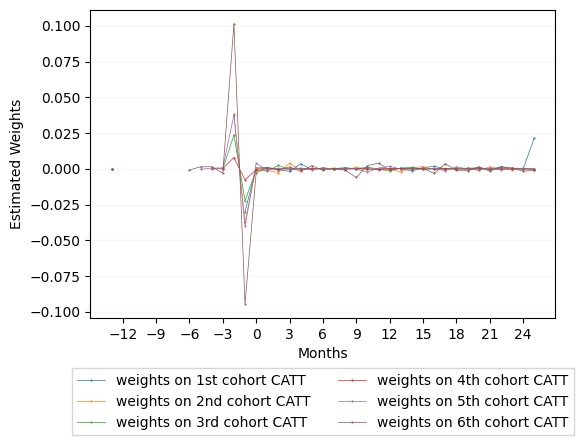

In [44]:
plt.figure(figsize=(6,4))

for x,y in zip(range(7), 
               ['weights on 1st cohort CATT', 'weights on 2nd cohort CATT', 'weights on 3rd cohort CATT', 
                'weights on 4th cohort CATT', 'weights on 5th cohort CATT', 'weights on 6th cohort CATT']):
    plt.plot(weights_for_effect_window.index,
               weights_for_effect_window.iloc[:,x],
           marker='.', label=y, linewidth=0.5, markersize=1)

    
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('Estimated Weights')
plt.grid(axis='y', alpha=0.1)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.savefig('msci_results/weights_msci_down_2.png', bbox_inches="tight");

### Refinitiv data

In [45]:
ref_joint_spec = pd.read_csv(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\refinitiv_results\up_down_hdfe_joint_spec_refinitiv.csv")

In [46]:
ref_joint_spec['ci_L'] = [x[0] for x in ref_joint_spec.ci95.str.split(',')]
ref_joint_spec['ci_U'] = [x[1] for x in ref_joint_spec.ci95.str.split(',')]
ref_joint_spec = ref_joint_spec.drop('ci95', axis=1)

In [47]:
ref_joint_spec = ref_joint_spec.apply(pd.to_numeric, errors='ignore')

In [48]:
ref_joint_spec_up = ref_joint_spec.iloc[:39, :]
ref_joint_spec_down = ref_joint_spec.iloc[39:, :].rename(columns={'rel_period':'rel_period_down', 'b':'b_down', 'ci_L':'ci_L_down', 'ci_U':'ci_U_down'}).reset_index(drop=True)

In [49]:
ref_joint_spec = pd.concat([ref_joint_spec_up, ref_joint_spec_down], axis=1)

In [50]:
ref_joint_spec['leads_lags_num'] = [x for x in range(-13, 26)]

In [51]:
ref_joint_spec

,rel_period,b,ci_L,ci_U,rel_period_down,b_down,ci_L_down,ci_U_down,leads_lags_num
0,bin_before_up,0.015217,-0.015863,0.046296,bin_before_down,0.035106,-0.029778,0.099990,-13
1,time_to_treatment_up_77,-0.009414,-0.028624,0.009795,time_to_treatment_down_61,0.005180,-0.029170,0.039529,-12
2,time_to_treatment_up_78,0.000006,-0.021518,0.021530,time_to_treatment_down_62,0.009745,-0.027127,0.046618,-11
3,time_to_treatment_up_79,-0.005795,-0.023895,0.012306,time_to_treatment_down_63,-0.002555,-0.049295,0.044185,-10
4,time_to_treatment_up_80,-0.006566,-0.026123,0.012990,time_to_treatment_down_64,-0.003199,-0.051228,0.044829,-9
5,time_to_treatment_up_81,0.005276,-0.015853,0.026405,time_to_treatment_down_65,0.007326,-0.046631,0.061283,-8
6,time_to_treatment_up_82,-0.007380,-0.025389,0.010629,time_to_treatment_down_66,-0.000760,-0.037758,0.036237,-7
7,time_to_treatment_up_83,-0.010070,-0.029192,0.009052,time_to_treatment_down_67,-0.001536,-0.041097,0.038026,-6
8,time_to_treatment_up_84,-0.000764,-0.024050,0.022521,time_to_treatment_down_68,0.009801,-0.031147,0.050749,-5
9,time_to_treatment_up_85,-0.008254,-0.025299,0.008792,time_to_treatment_down_69,-0.012546,-0.060758,0.035665,-4


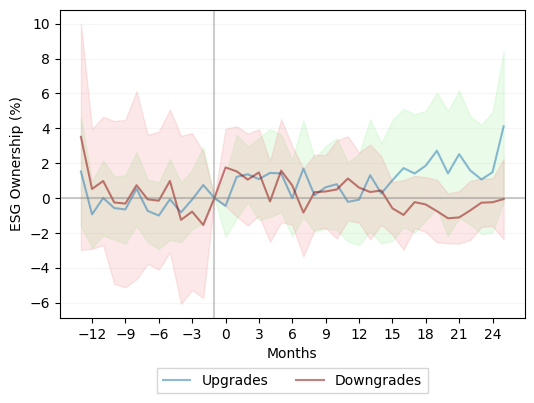

In [52]:
plt.figure(figsize=(6,4))

plt.plot(ref_joint_spec['leads_lags_num'], ref_joint_spec['b']*100, alpha=0.5, label='Upgrades')
plt.fill_between(ref_joint_spec['leads_lags_num'], (ref_joint_spec['ci_L']*100), (ref_joint_spec['ci_U']*100), color='lightgreen', alpha=0.18)

plt.plot(ref_joint_spec['leads_lags_num'], ref_joint_spec['b_down']*100, c='darkred', alpha=0.5, label='Downgrades')
plt.fill_between(ref_joint_spec['leads_lags_num'], (ref_joint_spec['ci_L_down']*100), (ref_joint_spec['ci_U_down']*100), color='lightcoral', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
# plt.title('TWFE estimates of reaction of ESG ownership to MSCI ESG ratings changes')
plt.savefig('refinitiv_results/twfe_ref_joint_spec.png', bbox_inches="tight");

## Robustness check

In [53]:
excluding_index_etf = pd.read_csv(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\msci_results\up_down_hdfe_joint_spec_msci_no_index_etf.csv")

In [54]:
excluding_index_etf

,rel_period,b,ci95
0,bin_before_up,0.008632,"-.0066281,.023893"
1,time_to_treatment_up_73,0.001036,"-.0127037,.0147755"
2,time_to_treatment_up_74,0.005398,"-.0104184,.0212138"
3,time_to_treatment_up_75,0.004567,"-.006538,.0156722"
4,time_to_treatment_up_76,0.002936,"-.0106782,.0165511"
...,...,...,...
73,time_to_treatment_down_106,-0.003665,"-.0243038,.016973"
74,time_to_treatment_down_107,-0.004183,"-.0260607,.0176944"
75,time_to_treatment_down_108,-0.005467,"-.0260661,.0151325"
76,time_to_treatment_down_109,-0.008644,"-.0314158,.0141279"


In [55]:
excluding_index_etf['ci_L'] = [x[0] for x in excluding_index_etf.ci95.str.split(',')]
excluding_index_etf['ci_U'] = [x[1] for x in excluding_index_etf.ci95.str.split(',')]
excluding_index_etf = excluding_index_etf.drop('ci95', axis=1)

In [56]:
excluding_index_etf = excluding_index_etf.apply(pd.to_numeric, errors='ignore')

In [57]:
excluding_index_etf_up = excluding_index_etf.iloc[:39, :]
excluding_index_etf_down = excluding_index_etf.iloc[39:, :].rename(columns={'rel_period':'rel_period_down', 'b':'b_down', 'ci_L':'ci_L_down', 'ci_U':'ci_U_down'}).reset_index(drop=True)

In [58]:
excluding_index_etf = pd.concat([excluding_index_etf_up, excluding_index_etf_down], axis=1)

In [59]:
excluding_index_etf['leads_lags_num'] = [x for x in range(-13, 26)]

In [60]:
excluding_index_etf

,rel_period,b,ci_L,ci_U,rel_period_down,b_down,ci_L_down,ci_U_down,leads_lags_num
0,bin_before_up,0.008632,-0.006628,0.023893,bin_before_down,-0.001233,-0.024371,0.021906,-13
1,time_to_treatment_up_73,0.001036,-0.012704,0.014776,time_to_treatment_down_73,0.014747,-0.006681,0.036175,-12
2,time_to_treatment_up_74,0.005398,-0.010418,0.021214,time_to_treatment_down_74,0.000833,-0.018817,0.020483,-11
3,time_to_treatment_up_75,0.004567,-0.006538,0.015672,time_to_treatment_down_75,0.005553,-0.013045,0.024150,-10
4,time_to_treatment_up_76,0.002936,-0.010678,0.016551,time_to_treatment_down_76,0.004699,-0.012251,0.021650,-9
5,time_to_treatment_up_77,0.009765,-0.003704,0.023235,time_to_treatment_down_77,0.005534,-0.008560,0.019629,-8
6,time_to_treatment_up_78,0.006042,-0.006390,0.018473,time_to_treatment_down_78,0.000906,-0.014590,0.016403,-7
7,time_to_treatment_up_79,0.001440,-0.011355,0.014236,time_to_treatment_down_79,0.008090,-0.006101,0.022280,-6
8,time_to_treatment_up_80,0.007127,-0.003480,0.017735,time_to_treatment_down_80,-0.010021,-0.027753,0.007710,-5
9,time_to_treatment_up_81,0.001980,-0.007447,0.011408,time_to_treatment_down_81,-0.000706,-0.013626,0.012214,-4


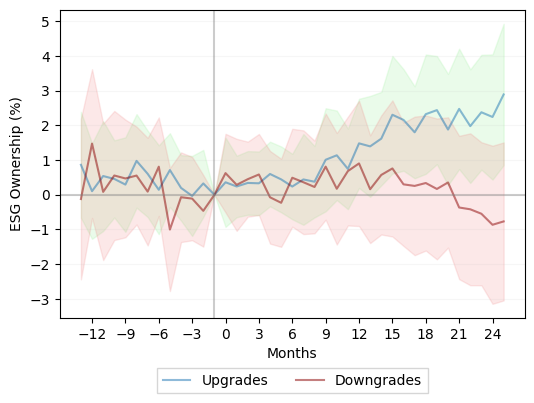

In [61]:
plt.figure(figsize=(6,4))

plt.plot(excluding_index_etf['leads_lags_num'], excluding_index_etf['b']*100, alpha=0.5, label='Upgrades')
plt.fill_between(excluding_index_etf['leads_lags_num'], (excluding_index_etf['ci_L']*100), (excluding_index_etf['ci_U']*100), color='lightgreen', alpha=0.18)

plt.plot(excluding_index_etf['leads_lags_num'], excluding_index_etf['b_down']*100, c='darkred', alpha=0.5, label='Downgrades')
plt.fill_between(excluding_index_etf['leads_lags_num'], (excluding_index_etf['ci_L_down']*100), (excluding_index_etf['ci_U_down']*100), color='lightcoral', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
# plt.title('TWFE estimates of reaction of ESG ownership to MSCI ESG ratings changes')
plt.savefig('msci_results/twfe_robust_no_index_etf.png', bbox_inches="tight");

## ESG weight as dependent variable

In [62]:
esg_weight = pd.read_csv('msci_results/esg_weight_up_down_hdfe_joint_spec_msci.csv')

In [63]:
esg_weight

,re_period,b,ci95
0,bin_before_up,0.040007,"-.0280821,.108096"
1,time_to_treatment_up_73,-0.005338,"-.0690163,.058341"
2,time_to_treatment_up_74,0.004751,"-.0547502,.0642525"
3,time_to_treatment_up_75,0.005536,"-.0444019,.0554744"
4,time_to_treatment_up_76,-0.008967,"-.0651046,.0471701"
...,...,...,...
73,time_to_treatment_down_106,-0.018639,"-.0741061,.0368275"
74,time_to_treatment_down_107,-0.022030,"-.07927,.0352101"
75,time_to_treatment_down_108,-0.020656,"-.0763337,.0350211"
76,time_to_treatment_down_109,-0.027530,"-.092933,.0378731"


In [64]:
esg_weight['ci_L'] = [x[0] for x in esg_weight.ci95.str.split(',')]
esg_weight['ci_U'] = [x[1] for x in esg_weight.ci95.str.split(',')]
esg_weight = esg_weight.drop('ci95', axis=1)

In [65]:
esg_weight = esg_weight.apply(pd.to_numeric, errors='ignore')

In [66]:
esg_weight_up = esg_weight.iloc[:39, :]
esg_weight_down = esg_weight.iloc[39:, :].rename(columns={'rel_period':'rel_period_down', 'b':'b_down', 'ci_L':'ci_L_down', 'ci_U':'ci_U_down'}).reset_index(drop=True)

In [67]:
esg_weight = pd.concat([esg_weight_up, esg_weight_down], axis=1)

In [68]:
esg_weight['leads_lags_num'] = [x for x in range(-13, 26)]

In [69]:
esg_weight

,re_period,b,ci_L,ci_U,re_period,b_down,ci_L_down,ci_U_down,leads_lags_num
0,bin_before_up,0.040007,-0.028082,0.108096,bin_before_down,0.020070,-0.044090,0.084229,-13
1,time_to_treatment_up_73,-0.005338,-0.069016,0.058341,time_to_treatment_down_73,0.030280,-0.025476,0.086035,-12
2,time_to_treatment_up_74,0.004751,-0.054750,0.064253,time_to_treatment_down_74,-0.013431,-0.079606,0.052744,-11
3,time_to_treatment_up_75,0.005536,-0.044402,0.055474,time_to_treatment_down_75,-0.003866,-0.074595,0.066864,-10
4,time_to_treatment_up_76,-0.008967,-0.065105,0.047170,time_to_treatment_down_76,0.014535,-0.036210,0.065281,-9
5,time_to_treatment_up_77,0.014340,-0.033709,0.062389,time_to_treatment_down_77,-0.008415,-0.063360,0.046531,-8
6,time_to_treatment_up_78,0.001819,-0.038151,0.041789,time_to_treatment_down_78,-0.006791,-0.059247,0.045666,-7
7,time_to_treatment_up_79,0.004548,-0.027750,0.036846,time_to_treatment_down_79,0.014245,-0.035497,0.063986,-6
8,time_to_treatment_up_80,-0.003240,-0.039031,0.032551,time_to_treatment_down_80,-0.026242,-0.085247,0.032762,-5
9,time_to_treatment_up_81,0.003439,-0.024731,0.031609,time_to_treatment_down_81,-0.004467,-0.061578,0.052644,-4


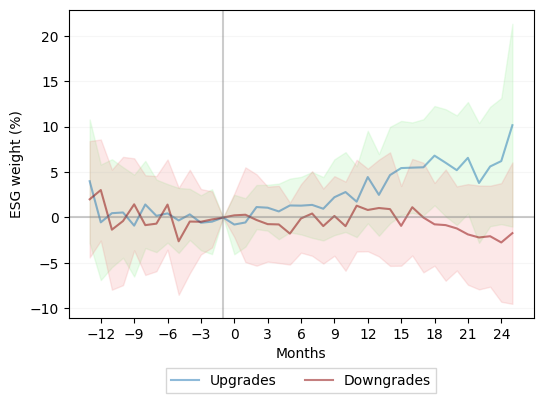

In [70]:
plt.figure(figsize=(6,4))

plt.plot(esg_weight['leads_lags_num'], esg_weight['b']*100, alpha=0.5, label='Upgrades')
plt.fill_between(esg_weight['leads_lags_num'], (esg_weight['ci_L']*100), (esg_weight['ci_U']*100), color='lightgreen', alpha=0.18)

plt.plot(esg_weight['leads_lags_num'], esg_weight['b_down']*100, c='darkred', alpha=0.5, label='Downgrades')
plt.fill_between(esg_weight['leads_lags_num'], (esg_weight['ci_L_down']*100), (esg_weight['ci_U_down']*100), color='lightcoral', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG weight (%)')
plt.grid(axis='y', alpha=0.1)
# plt.title('TWFE estimates of reaction of ESG ownership to MSCI ESG ratings changes')
plt.savefig('msci_results/esg_weight_twfe.png', bbox_inches="tight");

### Robust to Multicollinearity effect

In [71]:
msci_joint_spec = pd.read_csv(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\multicollinearity_check\up_down_hdfe_joint_spec_msci.csv")

In [72]:
msci_joint_spec['ci_L'] = [x[0] for x in msci_joint_spec.ci95.str.split(',')]
msci_joint_spec['ci_U'] = [x[1] for x in msci_joint_spec.ci95.str.split(',')]
msci_joint_spec = msci_joint_spec.drop('ci95', axis=1)

In [73]:
msci_joint_spec = msci_joint_spec.apply(pd.to_numeric, errors='ignore')

In [74]:
msci_joint_spec_up = msci_joint_spec.iloc[:38, :]
msci_joint_spec_down = msci_joint_spec.iloc[38:, :].rename(columns={'rel_period':'rel_period_down', 'b':'b_down', 'ci_L':'ci_L_down', 'ci_U':'ci_U_down'}).reset_index(drop=True)

In [75]:
msci_joint_spec = pd.concat([msci_joint_spec_up, msci_joint_spec_down], axis=1)

In [76]:
msci_joint_spec['leads_lags_num'] = [x for x in range(-12, 26)]

In [77]:
msci_joint_spec

,rel_period,b,ci_L,ci_U,rel_period_down,b_down,ci_L_down,ci_U_down,leads_lags_num
0,bin_before_up,0.013656,0.002053,0.025259,bin_before_down,-0.001341,-0.017732,0.015050,-12
1,time_to_treatment_up_74,0.009960,-0.001709,0.021629,time_to_treatment_down_74,-0.003119,-0.018187,0.011950,-11
2,time_to_treatment_up_75,0.007519,-0.002015,0.017054,time_to_treatment_down_75,-0.000030,-0.015884,0.015824,-10
3,time_to_treatment_up_76,0.004353,-0.005906,0.014612,time_to_treatment_down_76,0.000019,-0.016302,0.016341,-9
4,time_to_treatment_up_77,0.010738,-0.000271,0.021747,time_to_treatment_down_77,0.001180,-0.011702,0.014063,-8
5,time_to_treatment_up_78,0.006393,-0.004370,0.017155,time_to_treatment_down_78,-0.004620,-0.016988,0.007749,-7
6,time_to_treatment_up_79,0.001310,-0.006909,0.009529,time_to_treatment_down_79,0.001584,-0.010536,0.013704,-6
7,time_to_treatment_up_80,0.004895,-0.005427,0.015216,time_to_treatment_down_80,-0.015948,-0.031754,-0.000142,-5
8,time_to_treatment_up_81,0.001415,-0.007015,0.009845,time_to_treatment_down_81,-0.005777,-0.020211,0.008657,-4
9,time_to_treatment_up_82,-0.004033,-0.013165,0.005099,time_to_treatment_down_82,-0.006669,-0.018312,0.004973,-3


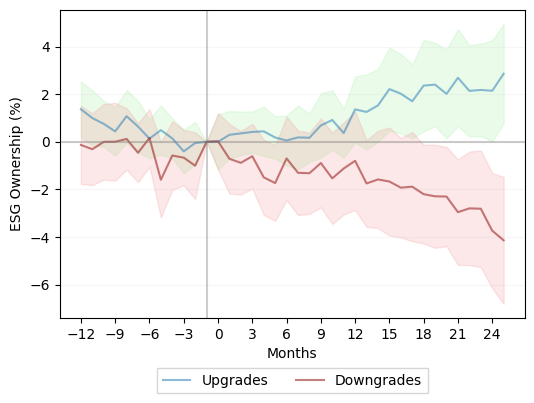

In [78]:
plt.figure(figsize=(6,4))

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b']*100, alpha=0.5, label='Upgrades')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L']*100), (msci_joint_spec['ci_U']*100), color='lightgreen', alpha=0.18)

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b_down']*100, c='darkred', alpha=0.5, label='Downgrades')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L_down']*100), (msci_joint_spec['ci_U_down']*100), color='lightcoral', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
# plt.title('TWFE estimates of reaction of ESG ownership to MSCI ESG ratings changes')
plt.savefig('multicollinearity_check/twfe_msci_joint_spec.png', bbox_inches="tight");

## FE vs IW estimates

In [79]:
iw_upgrades_msci = pd.read_excel(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\multicollinearity_check\upgrades_iw_msci.xlsx")

In [80]:
iw_upgrades_msci = iw_upgrades_msci.apply(pd.to_numeric, errors='ignore')

In [81]:
iw_upgrades_msci['leads_lags_num'] = [x for x in range(-12, 26)]

In [82]:
iw_upgrades_msci

,rel_period,b,Robust Std.Err,ci_L,ci_U,leads_lags_num
0,bin_before_up,0.019808,0.006651,0.006579,0.033037,-12
1,time_to_treatment_up_74,0.009744,0.005664,-0.001522,0.021010,-11
2,time_to_treatment_up_75,0.006322,0.004387,-0.002403,0.015047,-10
3,time_to_treatment_up_76,0.004318,0.004183,-0.004001,0.012638,-9
4,time_to_treatment_up_77,0.009976,0.004641,0.000745,0.019208,-8
5,time_to_treatment_up_78,0.005632,0.003888,-0.002101,0.013365,-7
6,time_to_treatment_up_79,0.002436,0.004691,-0.006895,0.011766,-6
7,time_to_treatment_up_80,0.005414,0.004587,-0.003709,0.014538,-5
8,time_to_treatment_up_81,0.001221,0.003538,-0.005815,0.008258,-4
9,time_to_treatment_up_82,-0.003151,0.004795,-0.012688,0.006387,-3


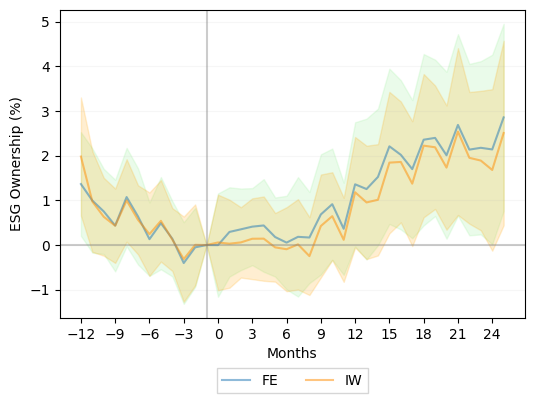

In [83]:
plt.figure(figsize=(6,4))

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b']*100, alpha=0.5, label='FE')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L']*100), (msci_joint_spec['ci_U']*100), color='lightgreen', alpha=0.18)

plt.plot(iw_upgrades_msci['leads_lags_num'], iw_upgrades_msci['b']*100, c='darkorange', alpha=0.5, label='IW')
plt.fill_between(iw_upgrades_msci['leads_lags_num'], (iw_upgrades_msci['ci_L']*100), (iw_upgrades_msci['ci_U']*100), color='orange', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
#plt.title('FE vs IW estimates of reaction of ESG ownership to MSCI ESG rating upgrades')
plt.savefig('multicollinearity_check/fe_iw_estimates_upgrades_msci.png', bbox_inches="tight");

In [84]:
iw_downgrades_msci = pd.read_excel(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\multicollinearity_check\downgrades_iw_msci.xlsx")

In [85]:
iw_downgrades_msci = iw_downgrades_msci.apply(pd.to_numeric, errors='ignore')

In [86]:
iw_downgrades_msci['leads_lags_num'] = [x for x in range(-12, 26)]

In [87]:
iw_downgrades_msci

,rel_period,b_down,Robust Std.Err.,ci_L_down,ci_U_down,leads_lags_num
0,bin_before_down,0.005124,0.010359,-0.015480,0.025728,-12
1,time_to_treatment_down_74,-0.003696,0.006169,-0.015967,0.008574,-11
2,time_to_treatment_down_75,0.000237,0.006771,-0.013230,0.013704,-10
3,time_to_treatment_down_76,-0.003464,0.006378,-0.016149,0.009221,-9
4,time_to_treatment_down_77,-0.000728,0.006901,-0.014453,0.012997,-8
5,time_to_treatment_down_78,-0.006561,0.006621,-0.019730,0.006608,-7
6,time_to_treatment_down_79,0.002719,0.006438,-0.010085,0.015523,-6
7,time_to_treatment_down_80,-0.015184,0.006443,-0.027999,-0.002369,-5
8,time_to_treatment_down_81,-0.004703,0.006322,-0.017278,0.007873,-4
9,time_to_treatment_down_82,-0.005885,0.005383,-0.016590,0.004821,-3


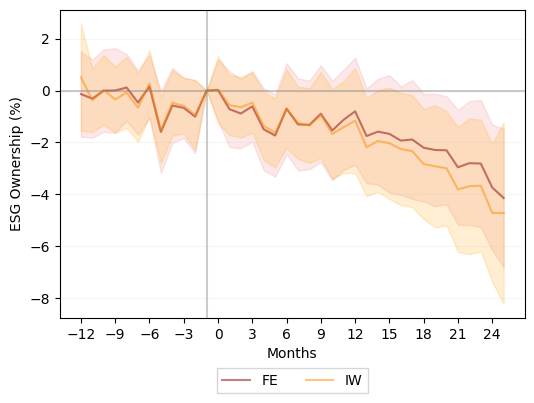

In [88]:
plt.figure(figsize=(6,4))

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b_down']*100, c='darkred', alpha=0.5, label='FE')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L_down']*100), (msci_joint_spec['ci_U_down']*100), color='lightcoral', alpha=0.18)

plt.plot(iw_downgrades_msci['leads_lags_num'], iw_downgrades_msci['b_down']*100, c='darkorange', alpha=0.5, label='IW')
plt.fill_between(iw_downgrades_msci['leads_lags_num'], (iw_downgrades_msci['ci_L_down']*100), (iw_downgrades_msci['ci_U_down']*100), color='orange', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
#plt.title('FE vs IW estimates of reaction of ESG ownership to MSCI ESG rating upgrades')
plt.savefig('multicollinearity_check/fe_iw_estimates_downgrades_msci.png', bbox_inches="tight");

### Using unbalanced sample (MSCI)

In [89]:
msci_joint_spec = pd.read_csv(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\msci_results\unbalanced\up_down_hdfe_joint_spec_msci.csv")

In [90]:
msci_joint_spec['ci_L'] = [x[0] for x in msci_joint_spec.ci95.str.split(',')]
msci_joint_spec['ci_U'] = [x[1] for x in msci_joint_spec.ci95.str.split(',')]
msci_joint_spec = msci_joint_spec.drop('ci95', axis=1)

In [91]:
msci_joint_spec = msci_joint_spec.apply(pd.to_numeric, errors='ignore')

In [92]:
msci_joint_spec_up = msci_joint_spec.iloc[:39, :]
msci_joint_spec_down = msci_joint_spec.iloc[39:, :].rename(columns={'rel_period':'rel_period_down', 'b':'b_down', 'ci_L':'ci_L_down', 'ci_U':'ci_U_down'}).reset_index(drop=True)

In [93]:
msci_joint_spec = pd.concat([msci_joint_spec_up, msci_joint_spec_down], axis=1)

In [94]:
msci_joint_spec['leads_lags_num'] = [x for x in range(-13, 26)]

In [95]:
msci_joint_spec

,rel_period,b,ci_L,ci_U,rel_period_down,b_down,ci_L_down,ci_U_down,leads_lags_num
0,bin_before_up,0.010278,-0.006021,0.026578,bin_before_down,0.003169,-0.013917,0.020255,-13
1,time_to_treatment_up_73,-0.003047,-0.018081,0.011987,time_to_treatment_down_73,0.011759,-0.004945,0.028463,-12
2,time_to_treatment_up_74,0.003940,-0.010568,0.018448,time_to_treatment_down_74,-0.000328,-0.015588,0.014932,-11
3,time_to_treatment_up_75,0.005215,-0.006800,0.017231,time_to_treatment_down_75,0.003195,-0.010576,0.016966,-10
4,time_to_treatment_up_76,-0.000331,-0.014887,0.014224,time_to_treatment_down_76,-0.000848,-0.012849,0.011152,-9
5,time_to_treatment_up_77,0.006060,-0.007023,0.019144,time_to_treatment_down_77,0.006745,-0.006757,0.020247,-8
6,time_to_treatment_up_78,0.003719,-0.008814,0.016251,time_to_treatment_down_78,-0.001808,-0.011746,0.008129,-7
7,time_to_treatment_up_79,-0.001223,-0.011556,0.009111,time_to_treatment_down_79,0.000930,-0.008853,0.010713,-6
8,time_to_treatment_up_80,0.004913,-0.004542,0.014368,time_to_treatment_down_80,-0.004716,-0.017037,0.007605,-5
9,time_to_treatment_up_81,0.001382,-0.009095,0.011858,time_to_treatment_down_81,-0.001712,-0.012044,0.008620,-4


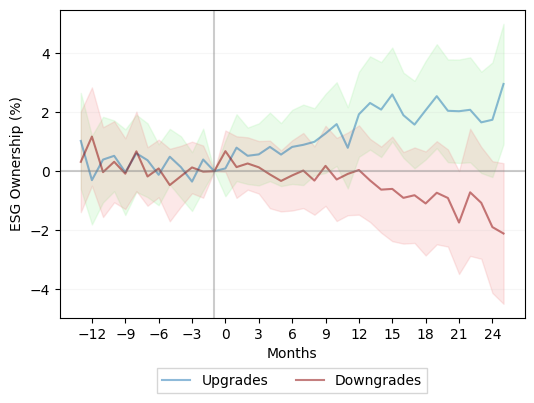

In [96]:
plt.figure(figsize=(6,4))

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b']*100, alpha=0.5, label='Upgrades')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L']*100), (msci_joint_spec['ci_U']*100), color='lightgreen', alpha=0.18)

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b_down']*100, c='darkred', alpha=0.5, label='Downgrades')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L_down']*100), (msci_joint_spec['ci_U_down']*100), color='lightcoral', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
# plt.title('TWFE estimates of reaction of ESG ownership to MSCI ESG ratings changes')
plt.savefig('msci_results/unbalanced/twfe_msci_joint_spec.png', bbox_inches="tight");

## FE vs IW estimates

In [97]:
iw_upgrades_msci = pd.read_excel(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\msci_results\unbalanced\upgrades_iw_msci.xlsx")

In [98]:
iw_upgrades_msci = iw_upgrades_msci.apply(pd.to_numeric, errors='ignore')

In [99]:
iw_upgrades_msci['leads_lags_num'] = [x for x in range(-13, 26)]

In [100]:
iw_upgrades_msci

,rel_period,b,Robust Std.Err.,ci_L,ci_U,leads_lags_num
0,bin_before_up,0.015604,0.004867,0.005924,0.025284,-13
1,time_to_treatment_up_73,0.004333,0.005165,-0.005939,0.014606,-12
2,time_to_treatment_up_74,0.007798,0.005426,-0.002994,0.018591,-11
3,time_to_treatment_up_75,0.010490,0.004562,0.001416,0.019564,-10
4,time_to_treatment_up_76,0.004821,0.004507,-0.004143,0.013785,-9
5,time_to_treatment_up_77,0.011425,0.004187,0.003098,0.019753,-8
6,time_to_treatment_up_78,0.007768,0.003342,0.001120,0.014416,-7
7,time_to_treatment_up_79,0.002816,0.004041,-0.005221,0.010854,-6
8,time_to_treatment_up_80,0.005640,0.003754,-0.001826,0.013107,-5
9,time_to_treatment_up_81,0.001444,0.003227,-0.004975,0.007864,-4


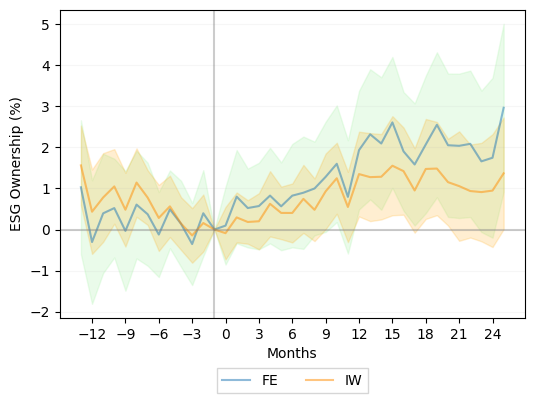

In [101]:
plt.figure(figsize=(6,4))

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b']*100, alpha=0.5, label='FE')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L']*100), (msci_joint_spec['ci_U']*100), color='lightgreen', alpha=0.18)

plt.plot(iw_upgrades_msci['leads_lags_num'], iw_upgrades_msci['b']*100, c='darkorange', alpha=0.5, label='IW')
plt.fill_between(iw_upgrades_msci['leads_lags_num'], (iw_upgrades_msci['ci_L']*100), (iw_upgrades_msci['ci_U']*100), color='orange', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
#plt.title('FE vs IW estimates of reaction of ESG ownership to MSCI ESG rating upgrades')
plt.savefig('msci_results/unbalanced/fe_iw_estimates_upgrades_msci.png', bbox_inches="tight");

In [102]:
iw_downgrades_msci = pd.read_excel(r"C:\Users\johnd\PycharmProjects\pythonproject\master_thesis\notebooks\msci_results\unbalanced\downgrades_iw_msci.xlsx")

In [103]:
iw_downgrades_msci = iw_downgrades_msci.apply(pd.to_numeric, errors='ignore')

In [104]:
iw_downgrades_msci['leads_lags_num'] = [x for x in range(-13, 26)]

In [105]:
iw_downgrades_msci

,rel_period,b_down,Robust Std.Err.,ci_L_down,ci_U_down,leads_lags_num
0,bin_before_down,0.000822,0.008963,-0.017006,0.018649,-13
1,time_to_treatment_down_73,0.009407,0.007853,-0.006211,0.025026,-12
2,time_to_treatment_down_74,-0.002210,0.006846,-0.015827,0.011407,-11
3,time_to_treatment_down_75,0.000930,0.006286,-0.011572,0.013433,-10
4,time_to_treatment_down_76,-0.004654,0.006498,-0.017579,0.008270,-9
5,time_to_treatment_down_77,0.005204,0.007042,-0.008801,0.019210,-8
6,time_to_treatment_down_78,-0.003188,0.005406,-0.013941,0.007564,-7
7,time_to_treatment_down_79,0.000364,0.006213,-0.011993,0.012721,-6
8,time_to_treatment_down_80,-0.004294,0.006065,-0.016357,0.007769,-5
9,time_to_treatment_down_81,-0.001410,0.006060,-0.013463,0.010642,-4


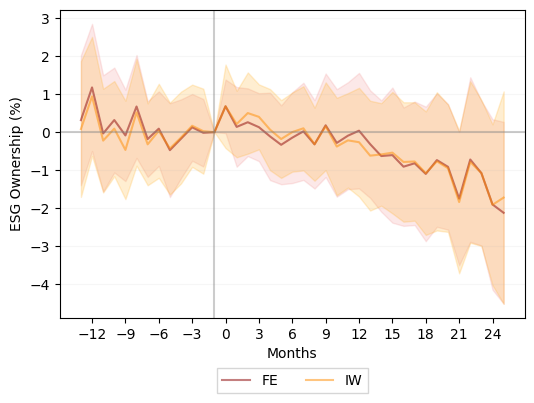

In [106]:
plt.figure(figsize=(6,4))

plt.plot(msci_joint_spec['leads_lags_num'], msci_joint_spec['b_down']*100, c='darkred', alpha=0.5, label='FE')
plt.fill_between(msci_joint_spec['leads_lags_num'], (msci_joint_spec['ci_L_down']*100), (msci_joint_spec['ci_U_down']*100), color='lightcoral', alpha=0.18)

plt.plot(iw_downgrades_msci['leads_lags_num'], iw_downgrades_msci['b_down']*100, c='darkorange', alpha=0.5, label='IW')
plt.fill_between(iw_downgrades_msci['leads_lags_num'], (iw_downgrades_msci['ci_L_down']*100), (iw_downgrades_msci['ci_U_down']*100), color='orange', alpha=0.18)

plt.axvline(-1, ls='-', c='grey', alpha=0.4)
plt.axhline(0, ls='-', c='grey', alpha=0.4)
plt.legend(bbox_to_anchor=(0.5, -0.14),fancybox=False, shadow=False, ncol=2, loc='upper center')
plt.xticks([x for x in range(-12,27, 3)], rotation=0)
plt.xlabel('Months')
plt.ylabel('ESG Ownership (%)')
plt.grid(axis='y', alpha=0.1)
#plt.title('FE vs IW estimates of reaction of ESG ownership to MSCI ESG rating upgrades')
plt.savefig('msci_results/unbalanced/fe_iw_estimates_downgrades_msci.png', bbox_inches="tight");

### Summary statistics

In [107]:
unbalanced= pd.read_stata('./msci_results/unbalanced/unbalanced_sample_msci.dta')

In [108]:
unbalanced.MthPrc = unbalanced.MthPrc.apply(lambda x: x.replace(',', '')).astype(float)

In [109]:
unbalanced.MthCap = unbalanced.MthCap.apply(lambda x: x.replace(',', '')).astype(float)

In [110]:
summary_statistcis_list = ['esg_ownership_percent', 'esg_weight_percent', 'industry_adjusted_score']

In [111]:
summary_statistics_table = unbalanced.loc[:, summary_statistcis_list].describe().T.apply(lambda x: x.map('{:.3f}'.format))

In [112]:
summary_statistics_table = summary_statistics_table.rename(index={'esg_ownership_percent': 'ESG ownership (%)',
                                       'esg_weight_percent':'ESG weight (%)', 
                                      'industry_adjusted_score': 'ESG score [0-10]',
                                      'nbr_shares': 'Number of shares', 
                                      'ShrOut':'Shares outstanding',
                                      'MthPrc': 'Monthly stock price',
                                      'MthCap': 'Monthly market cap',
                                      'm_cap_held': 'Market cap held',
                                      'total_mcap_held': 'Total cap held'})

In [113]:
summary_statistics_table = summary_statistics_table.drop(columns=['min', 'max', '25%', '50%', '75%'])

In [114]:
summary_statistics_table

,count,mean,std
ESG ownership (%),16313.000,0.111,0.110
ESG weight (%),16313.000,0.237,0.429
ESG score [0-10],16313.000,4.791,2.097


In [115]:
# latex output
print(summary_statistics_table.to_latex())

\begin{tabular}{llll}
\toprule
{} &      count &   mean &    std \\
\midrule
ESG ownership (\%) &  16313.000 &  0.111 &  0.110 \\
ESG weight (\%)    &  16313.000 &  0.237 &  0.429 \\
ESG score [0-10]  &  16313.000 &  4.791 &  2.097 \\
\bottomrule
\end{tabular}



C:\Users\johnd\AppData\Local\Temp\ipykernel_16552\3328546632.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary_statistics_table.to_latex())


### Number of firms in unbalanced sample

In [116]:
unbalanced.ISIN.drop_duplicates()

0        US0010551028
85       US00130H1059
161      US00206R1023
246      US0028241000
331      US00724F1012
             ...     
15920    IE00BDB6Q211
15980    CH0114405324
16065    CH0102993182
16150    LR0008862868
16235    SG9999000020
Name: ISIN, Length: 212, dtype: object